In [488]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [489]:
df = pd.read_csv('./diabetes.csv')
df.shape

(768, 9)

In [490]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


All patients here are females at least 21 years old.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 
    - 1 -> Tested positive for Diabetes

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [492]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [493]:
print(f"Total NULL values present in this are {df.isna().sum().sum()}")
df.isna().sum()

Total NULL values present in this are 0


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Is the Output data imbalanced ?

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

|Degree of imbalance|	Proportion of Minority Class|
|---|----|
|Mild | 	20-40% of the data set|
|Moderate	 | 1-20% of the data set|
|Extreme | 	<1% of the data set|

<AxesSubplot:xlabel='Outcome', ylabel='count'>

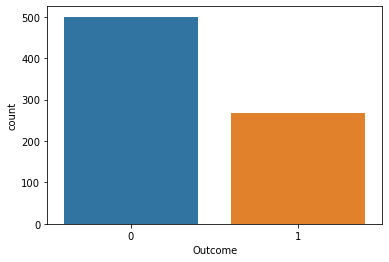

In [494]:
sns.countplot(df['Outcome'])

In [495]:
percentage_of_minority_data = (df[df['Outcome']==1].shape[0]/df['Outcome'].shape[0]*100)

percentage_of_minority_data

34.89583333333333

Obervation:
- Data is mildly Imbalanced

### Distribution of Each Column

In [496]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.17375350179188992
Skewness for the column BloodPressure is -1.8436079833551302
Skewness for the column SkinThickness is 0.10937249648187608
Skewness for the column Insulin is 2.272250858431574
Skewness for the column BMI is -0.42898158845356543
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


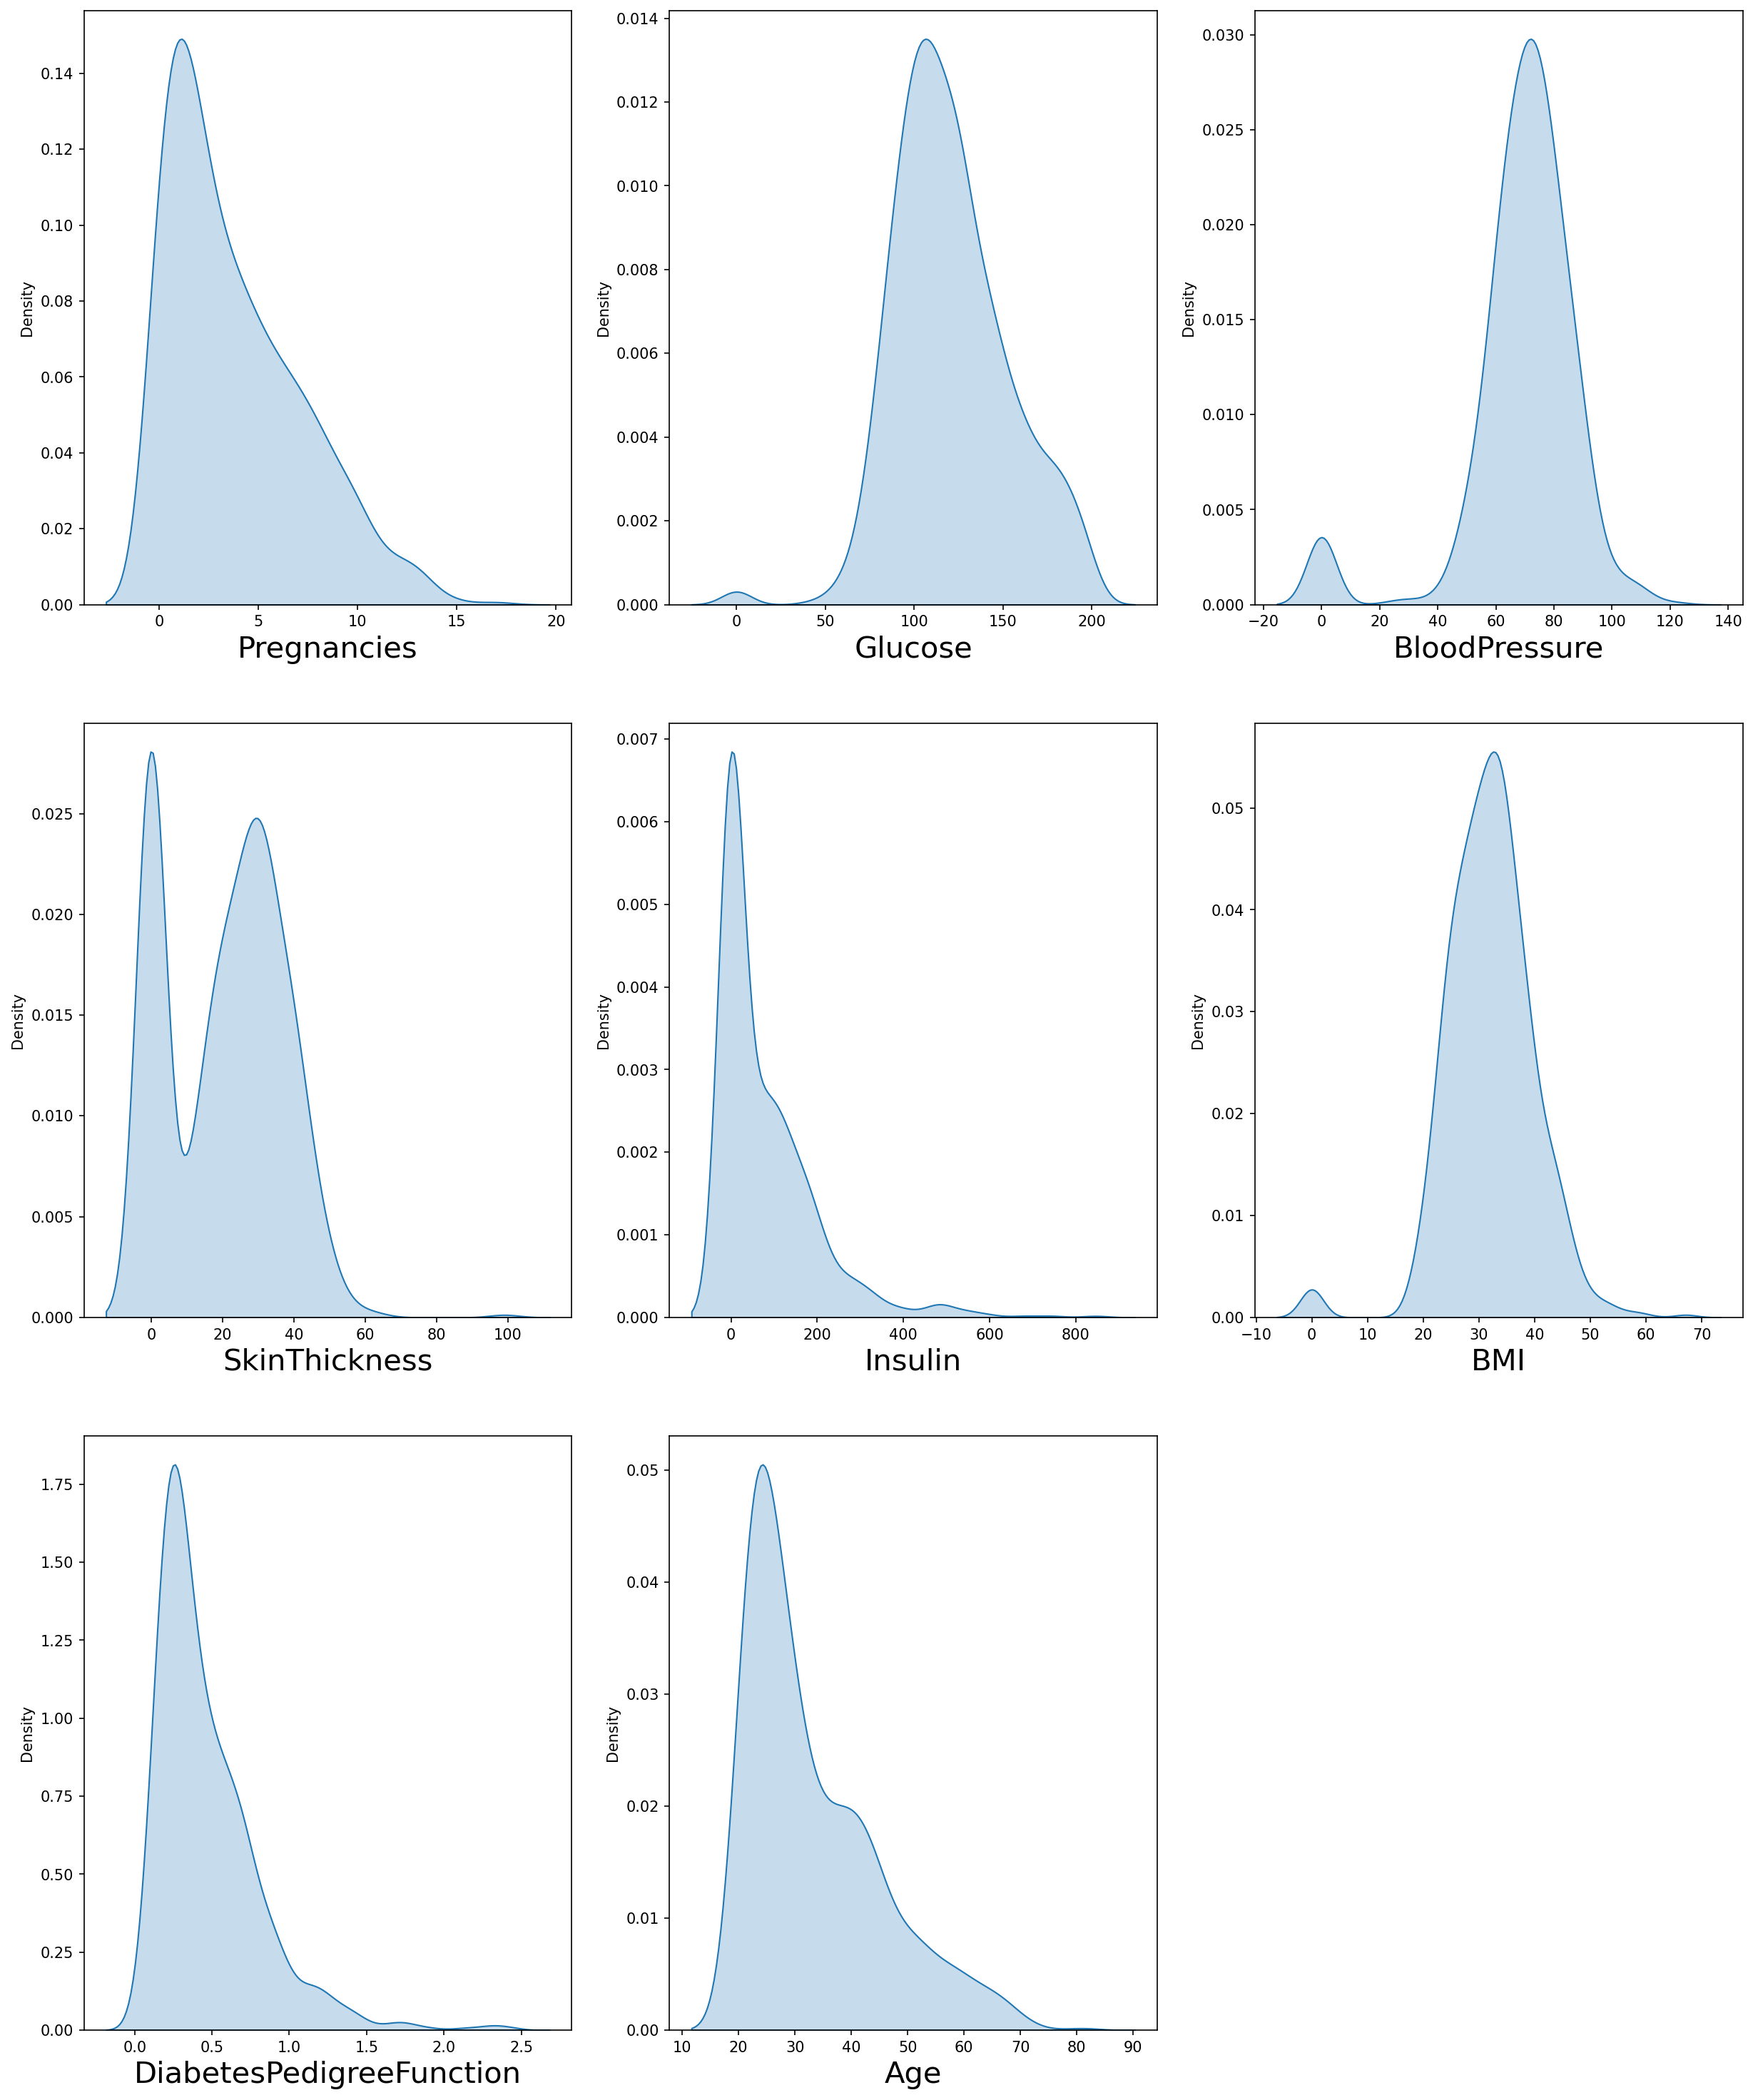

In [497]:
plt.figure(figsize=(20,25), facecolor='white', dpi=150)
plotnumber = 1

for column in df.columns[:-1]:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.kdeplot(df[column], fill=True)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [498]:
df.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
723,5,117,86,30,105,39.1,0.251,42,0
391,5,166,76,0,0,45.7,0.340,27,1
437,5,147,75,0,0,29.9,0.434,28,0
118,4,97,60,23,0,28.2,0.443,22,0


In [499]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

### Adding Age Groups

In [500]:
df_copy = df.copy()



def ageGroup(age):
    if age<=30:
        return 'A'
    elif age<=40:
        return'B'
    elif  age<=50:
        return 'C'
    else:
        return'D'

In [501]:
df_copy['AgeGroup'] = df_copy['Age'].apply(ageGroup)

In [502]:
df_copy['AgeGroup'].value_counts()

A    417
B    157
C    113
D     81
Name: AgeGroup, dtype: int64

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

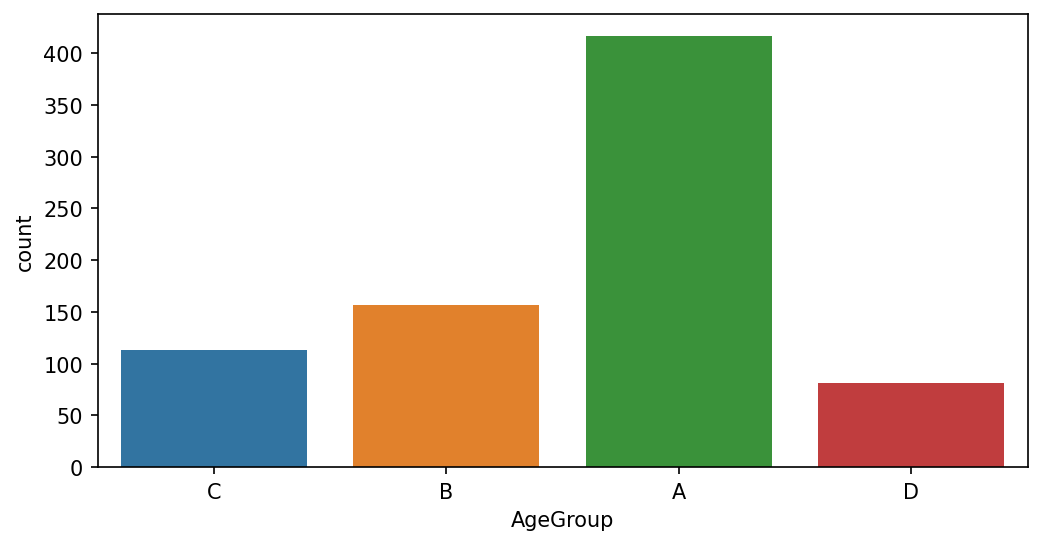

In [503]:
plt.figure(figsize=(8,4), dpi=150)

sns.countplot(x='AgeGroup', data=df_copy)

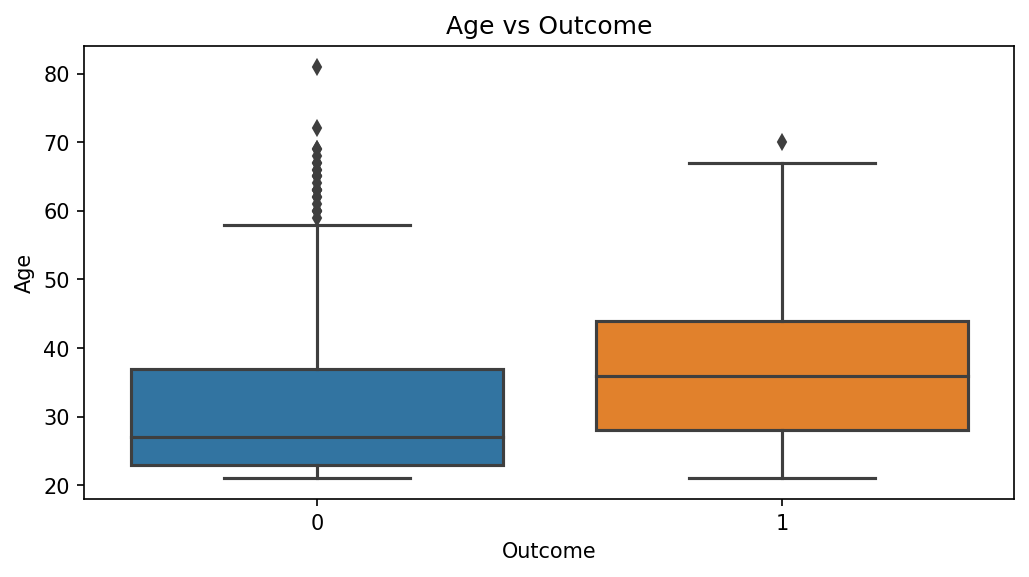

In [556]:
plt.figure(figsize=(8,4), dpi=150)
sns.boxplot(data=df, y='Age', x='Outcome')
plt.title('Age vs Outcome')
plt.show()

In [504]:
group_wise_positive = df_copy.groupby(['AgeGroup','Outcome']).count().reset_index()

group_wise_positive

,AgeGroup,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,A,0,327,327,327,327,327,327,327,327
1,A,1,90,90,90,90,90,90,90,90
2,B,0,81,81,81,81,81,81,81,81
3,B,1,76,76,76,76,76,76,76,76
4,C,0,49,49,49,49,49,49,49,49
5,C,1,64,64,64,64,64,64,64,64
6,D,0,43,43,43,43,43,43,43,43
7,D,1,38,38,38,38,38,38,38,38


In [505]:


for grp in group_wise_positive['AgeGroup'].unique():
   temp = group_wise_positive[group_wise_positive['AgeGroup']==grp]
   (temp[temp['Outcome']==1]['Age']/np.sum(temp['Age']))*100
   print(f"GROUP {grp}:  {(temp[temp['Outcome']==1]['Age']/np.sum(temp['Age']))*100}")
  

GROUP A:  1    21.582734
Name: Age, dtype: float64
GROUP B:  3    48.407643
Name: Age, dtype: float64
GROUP C:  5    56.637168
Name: Age, dtype: float64
GROUP D:  7    46.91358
Name: Age, dtype: float64


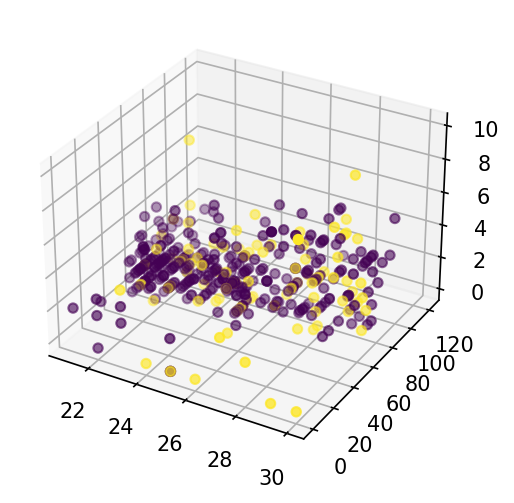

In [588]:
# if we have less features, we can use 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_copy['Age'][df_copy['AgeGroup']=='A'],df_copy['BloodPressure'][df_copy['AgeGroup']=='A'],df_copy['Pregnancies'][df_copy['AgeGroup']=='A'], c=df_copy['Outcome'][df_copy['AgeGroup']=='A'])


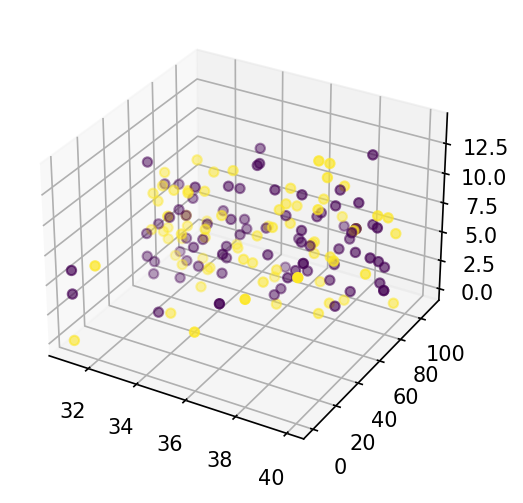

In [593]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_copy['Age'][df_copy['AgeGroup']=='B'],df_copy['BloodPressure'][df_copy['AgeGroup']=='B'],df_copy['Pregnancies'][df_copy['AgeGroup']=='B'], c=df_copy['Outcome'][df_copy['AgeGroup']=='B'])


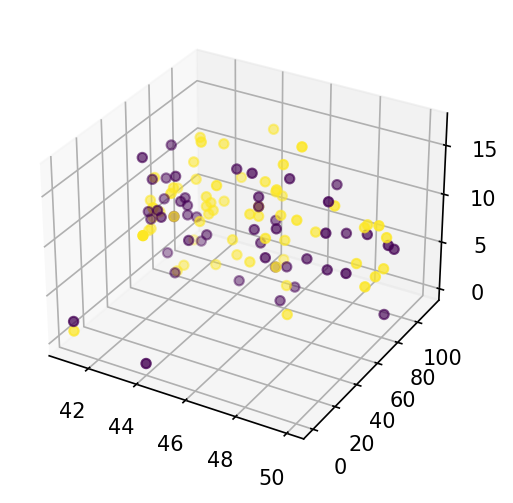

In [594]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_copy['Age'][df_copy['AgeGroup']=='C'],df_copy['BloodPressure'][df_copy['AgeGroup']=='C'],df_copy['Pregnancies'][df_copy['AgeGroup']=='C'], c=df_copy['Outcome'][df_copy['AgeGroup']=='C'])

Observation:
- Most of the patients are on the age group of 21-30. In fact they are doubled when compared with remaining all other age groups together
- Younger people(21-30) have less changes of having Diabetes when compared to other age groups.
- The median of the age of diabetic people is greater than that of non-diabetic people.

In [543]:
import warnings
warnings.filterwarnings("ignore")


def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure(figsize=(8,4), dpi=150)

    sns.distplot(x=df[col_name][df.Outcome == 1], color ="red", rug = True)
    sns.distplot(x=df[col_name][df.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])


In [544]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    a=df.query('Outcome == 0')[var].mean()
    b=df.query('Outcome == 1')[var].mean()

    return pd.DataFrame([a,b], columns=[var])

### BMI

In [506]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [507]:
avg_bmi_for_1 = df[df['Outcome']==1]['BMI'].mean()

avg_bmi_for_1

35.14253731343278

In [508]:
avg_bmi_for_0 = df[df['Outcome']==0]['BMI'].mean()

avg_bmi_for_0

30.30419999999996

In [545]:
mean_target('BMI')

,BMI
0,30.887995
1,35.359341


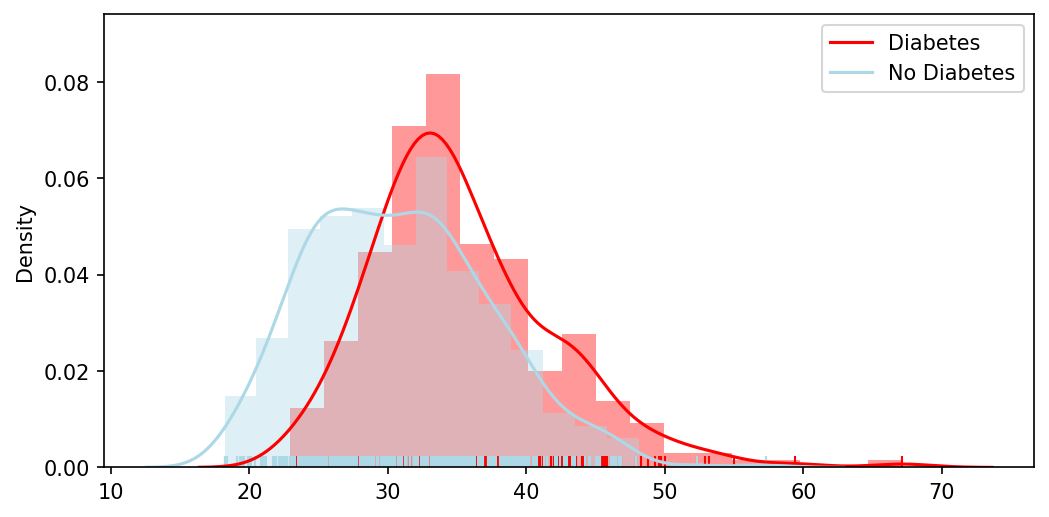

In [546]:
distplot('BMI')

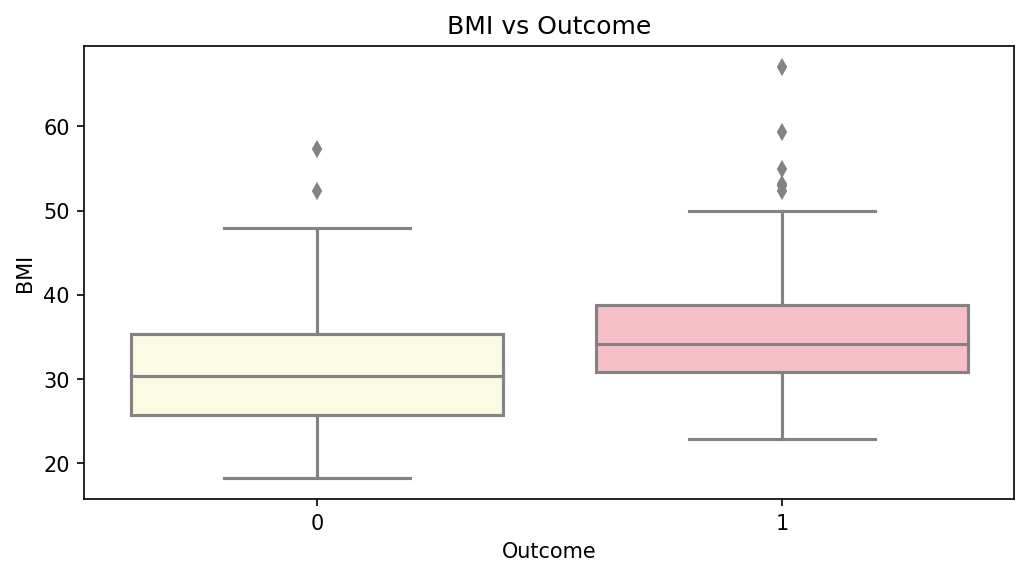

In [574]:
plt.figure(figsize=(8,4), dpi=150)

my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

Observation:
- Average BMI is higher for patients having Diabetes

### Glucose

- Average Sugar level for adults should be from 90 to 130 mg/dL (5.0 to 7.2 mmol/L) to be considered as normal.

In [509]:
df['Glucose'].mean()

120.89453125

In [510]:
df[df['Outcome']==1]['Glucose'].mean()

print(f'Average Glucose level for Patients having Diabetes is ',df[df['Outcome']==1]['Glucose'].mean())

Average Glucose level for Patients having Diabetes is  141.25746268656715


In [511]:
df[df['Outcome']==0]['Glucose'].mean()

print(f'Average Glucose level for  Patients NOT having Diabetes is ',df[df['Outcome']==0]['Glucose'].mean())

Average Glucose level for  Patients NOT having Diabetes is  109.98


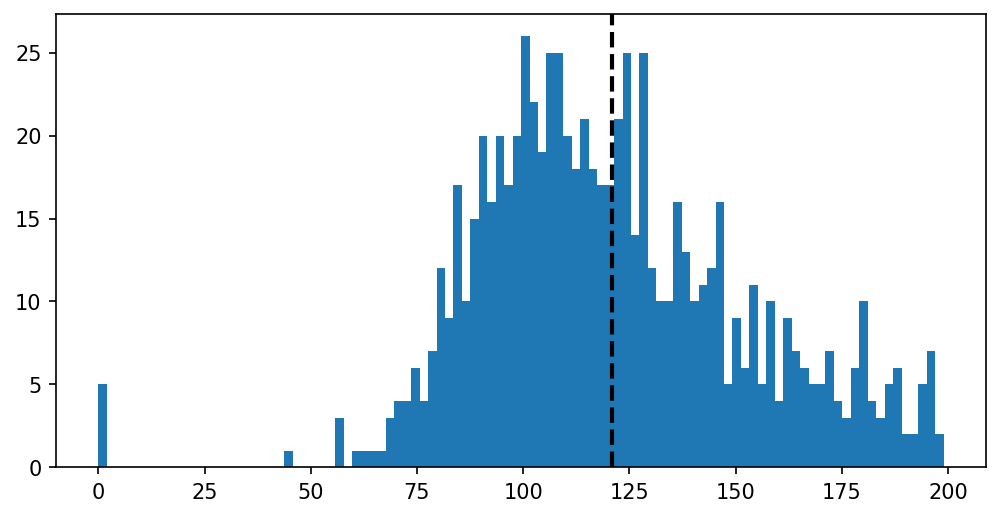

In [512]:
plt.figure(figsize=(8,4), dpi=150)

# sns.displot(data=df, x='Glucose', kde=True)

plt.hist(df['Glucose'], 100)
 
# plotting mean line
plt.axvline(df['Glucose'].mean(), color='k', linestyle='dashed', linewidth=2)
 
# showing the plot
plt.show()

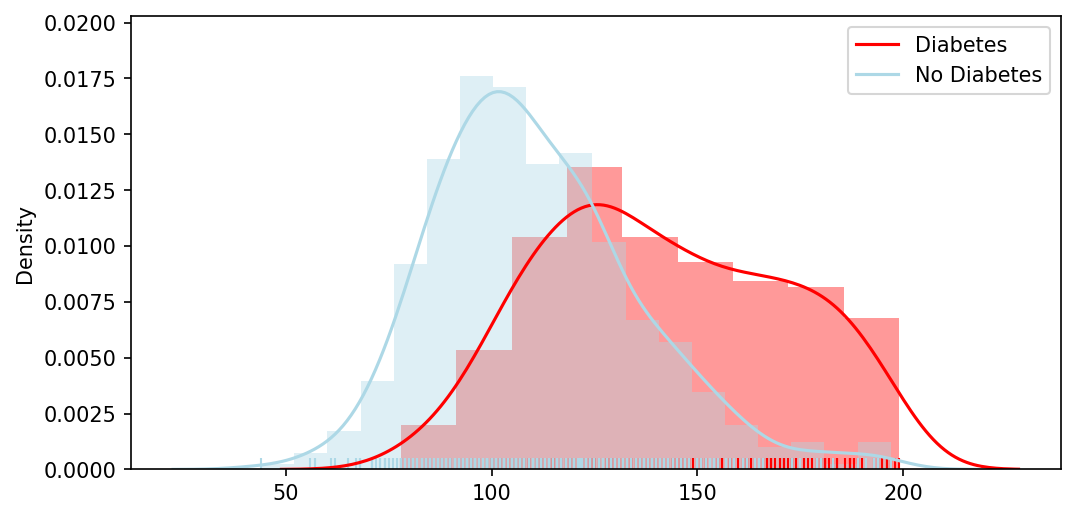

In [547]:
distplot('Glucose')

In [548]:
mean_target('Glucose')

,Glucose
0,110.709431
1,142.144483


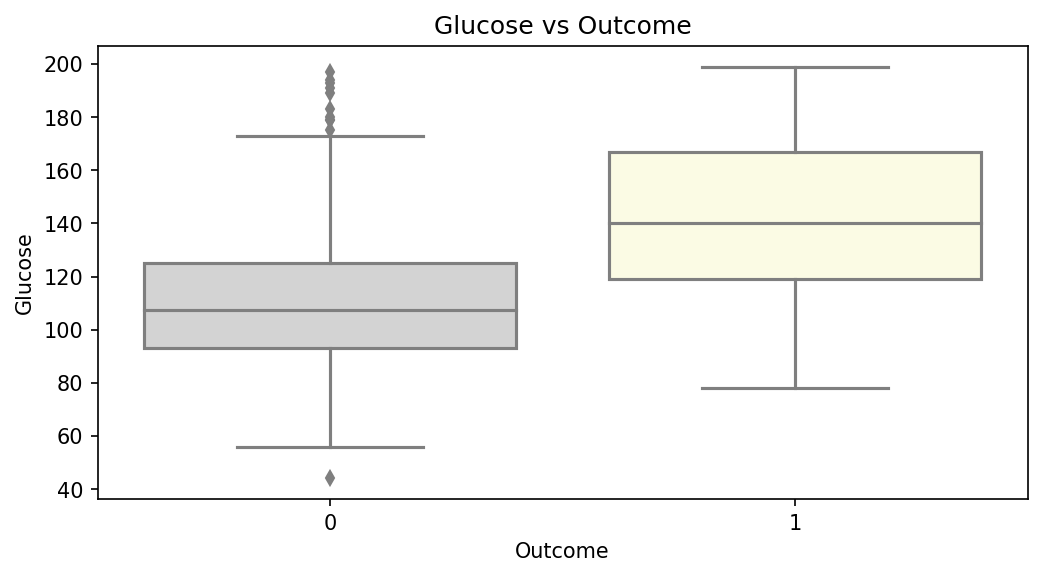

In [573]:
plt.figure(figsize=(8,4), dpi=150)
my_pal = {0: "lightgrey", 1: "lightyellow"}

sns.boxplot(data=df, x='Outcome', y='Glucose', palette=my_pal)

plt.title('Glucose vs Outcome')
plt.show()

Observation:
- Mean of Sugar levels in diabetic patients is high when compared to Non-diabetic
- Median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.

### DiabetesPedigreeFunction: 
- Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

In [513]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [514]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

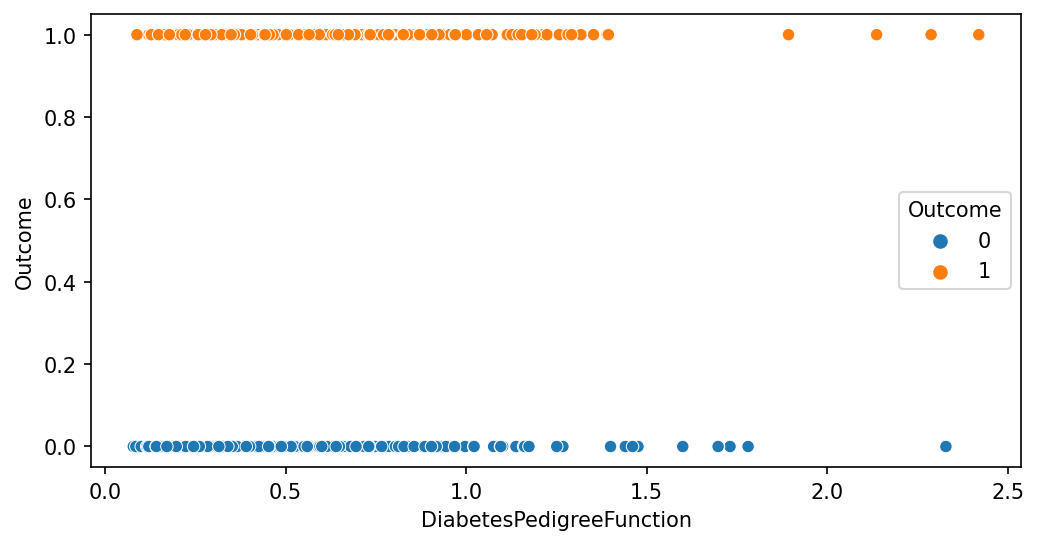

In [515]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(data=df, x='DiabetesPedigreeFunction',y='Outcome', hue='Outcome')

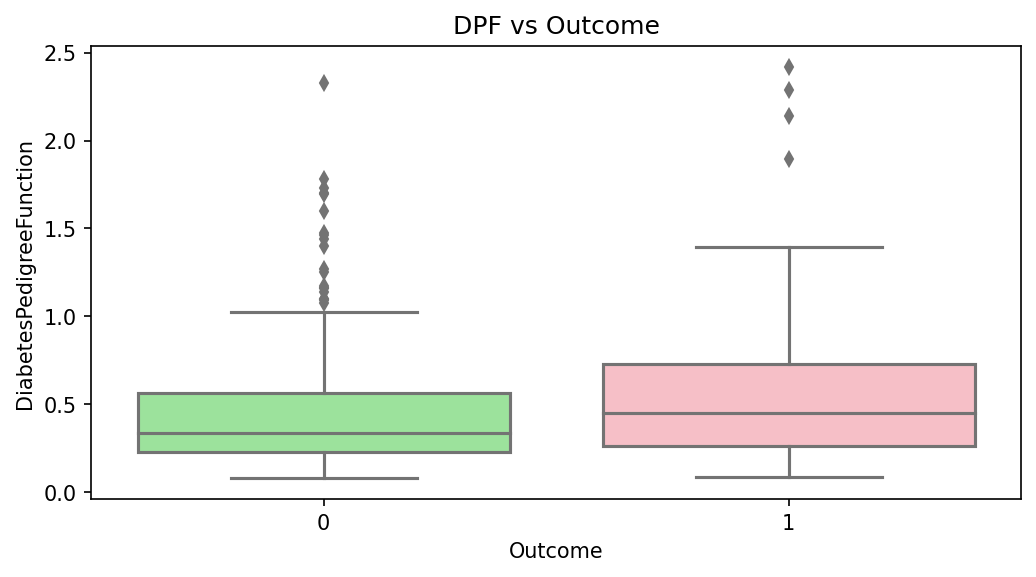

In [569]:
plt.figure(figsize=(8,4), dpi=150)

sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction', palette={0: "lightgreen", 1: "lightpink"})

plt.title('DPF vs Outcome')
plt.show()

Observation:
- From above plot we cannot conclusively decide result by using 'Pedigree' function value

### BLOOD PRESSURE

- High blood pressure is twice as likely to strike a person with diabetes than a person without diabetes.

In [516]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
369,1,133,102,28,140,32.8,0.234,45,1
102,0,125,96,0,0,22.5,0.262,21,0
260,3,191,68,15,130,30.9,0.299,34,0
430,2,99,0,0,0,22.2,0.108,23,0
762,9,89,62,0,0,22.5,0.142,33,0


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

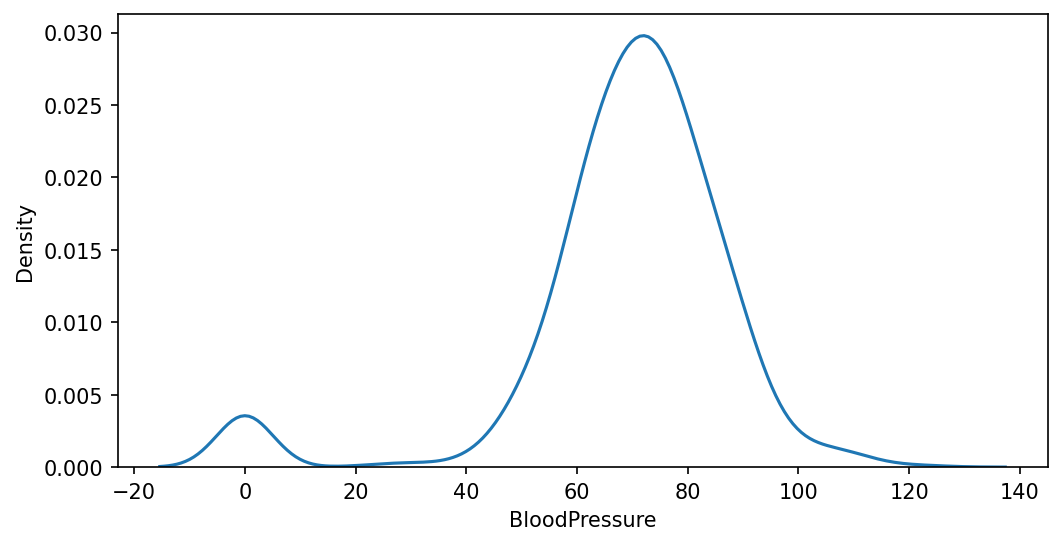

In [517]:
plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(data=df, x='BloodPressure')

In [518]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [519]:
# df[(df['BloodPressure']==0) & (df['Outcome']==0)]['BloodPressure'] = 'a'

df[df['Outcome']==0]['BloodPressure'].replace(0,df[df['Outcome']==0]['BloodPressure'].mean(axis=0), inplace=True)
df[df['Outcome']==1]['BloodPressure'].replace(0,df[df['Outcome']==1]['BloodPressure'].mean(axis=0), inplace=True)

## The above lines gives warning and doesn't change the values as intended

In [520]:
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace=True)

In [521]:
df['BloodPressure'].describe()

count    768.000000
mean      72.254807
std       12.115932
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

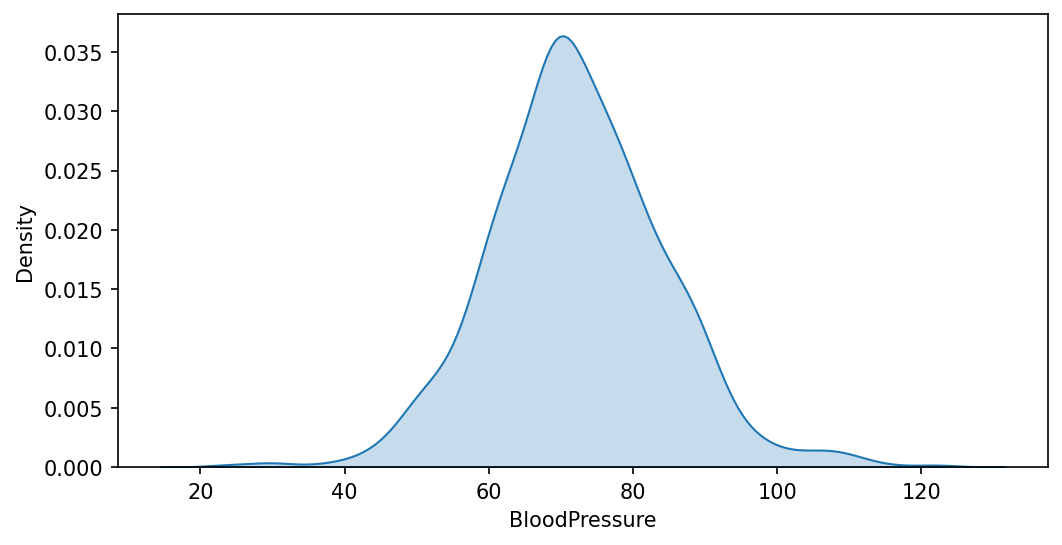

In [522]:
plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(data=df, x='BloodPressure', fill=True)


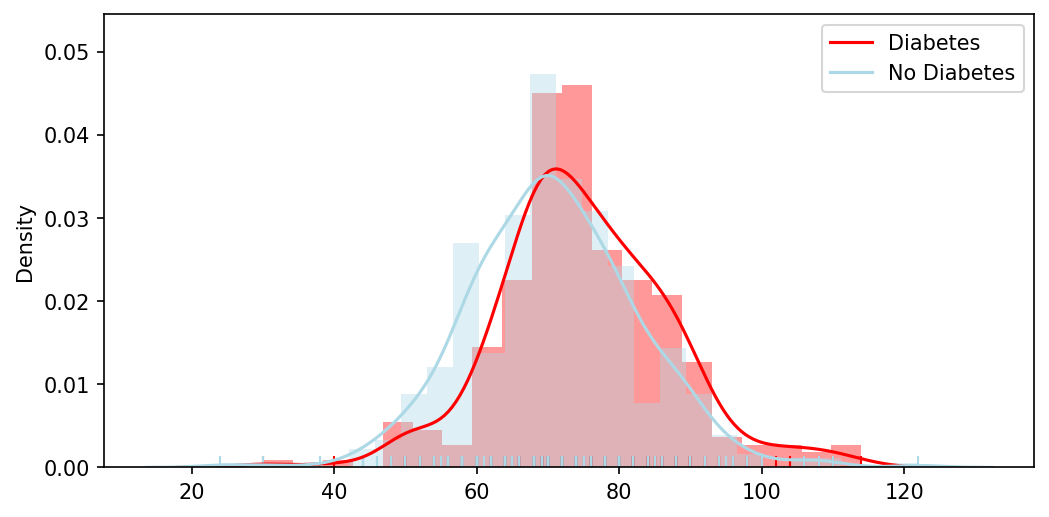

In [549]:
distplot('BloodPressure')

In [551]:
mean_target('BloodPressure')

,BloodPressure
0,70.810008
1,75.017756


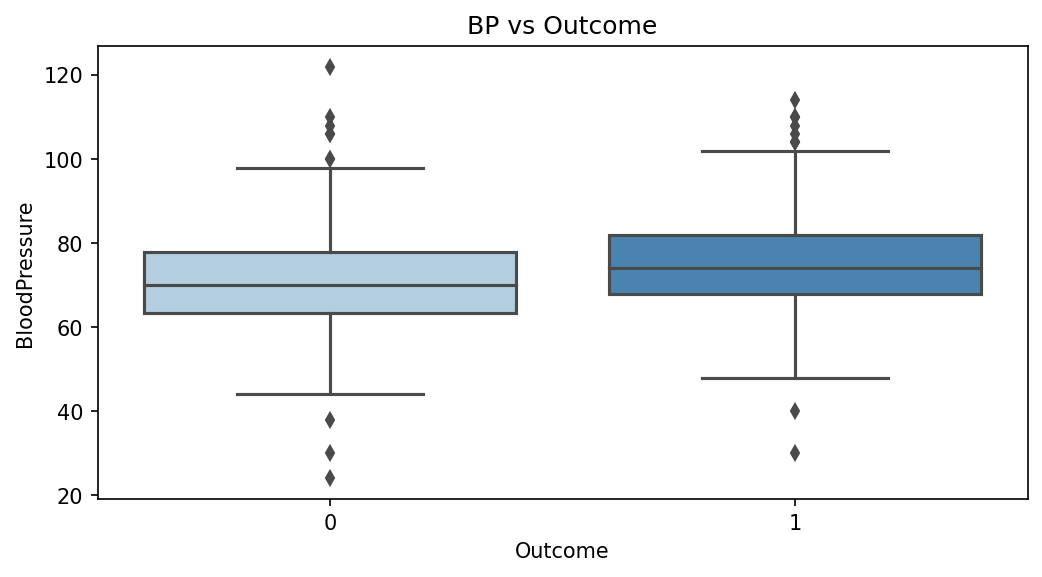

In [557]:
plt.figure(figsize=(8,4), dpi=150)

sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

Relationship between __Age__ and __BloodPressure__

<Figure size 1200x600 with 0 Axes>

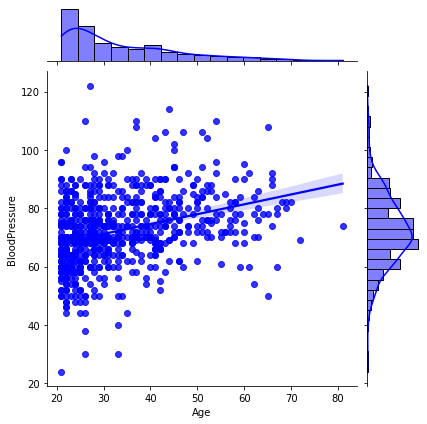

In [565]:
plt.figure(figsize=(8,4), dpi=150)

sns.jointplot(data=df, x='Age', y='BloodPressure', kind='reg', color='blue')

Observation :
- The mean of the blood pressure is greater for diabetic people as compared to the non-diabetic people
- As the age increases, generally the Blood Pressure also increases

### PREGNANCIES

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

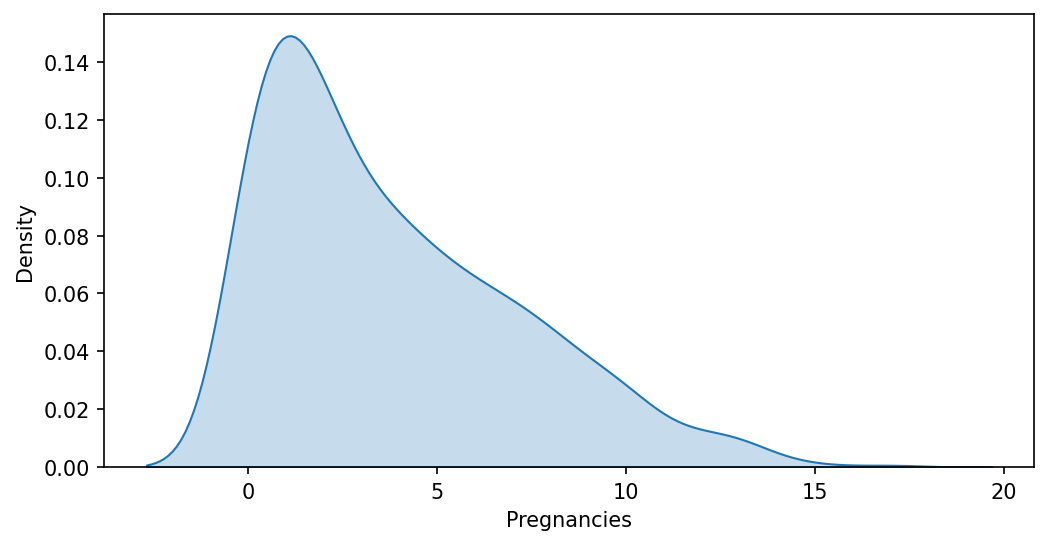

In [523]:
plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(data=df, x='Pregnancies', fill=True)

In [524]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

<AxesSubplot:xlabel='Pregnancies'>

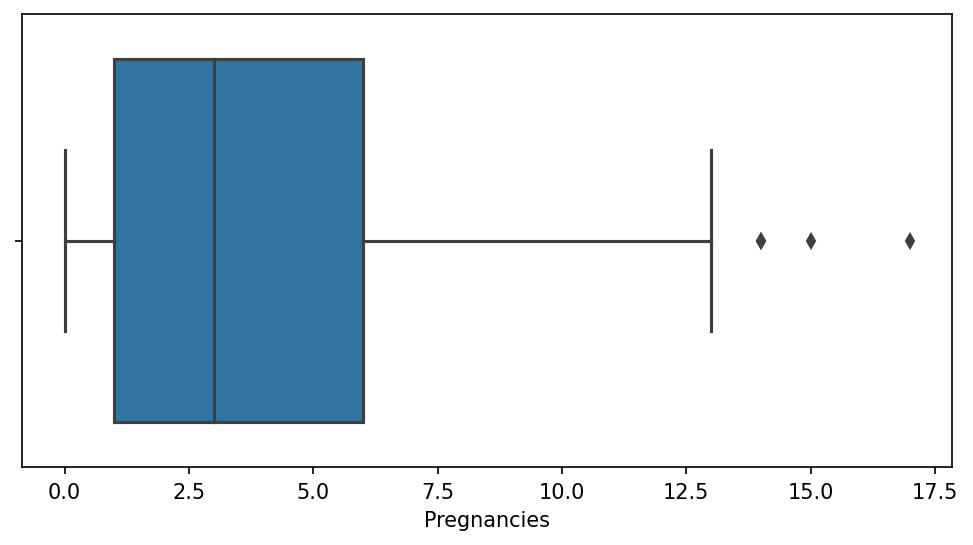

In [525]:
plt.figure(figsize=(8,4), dpi=150)

sns.boxplot(data=df, x='Pregnancies')

In [526]:
outliers_index_pregnancies = df[df['Pregnancies']>13].index

outliers_index_pregnancies

Int64Index([88, 159, 298, 455], dtype='int64')

In [527]:
df.drop(outliers_index_pregnancies, axis=0, inplace=True)

<AxesSubplot:xlabel='Pregnancies'>

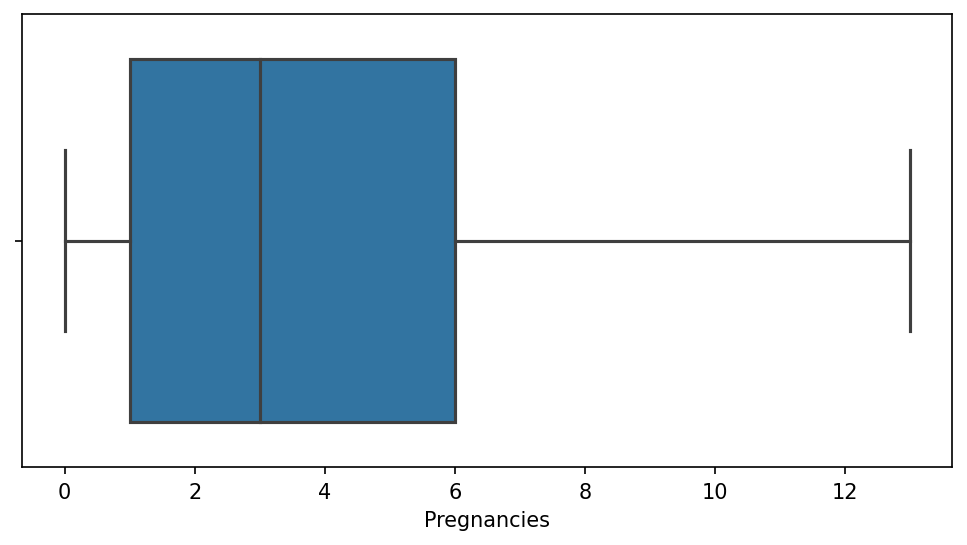

In [528]:
plt.figure(figsize=(8,4), dpi=150)

sns.boxplot(data=df, x='Pregnancies')

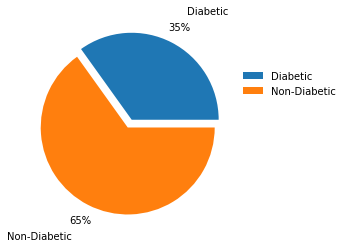

In [529]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

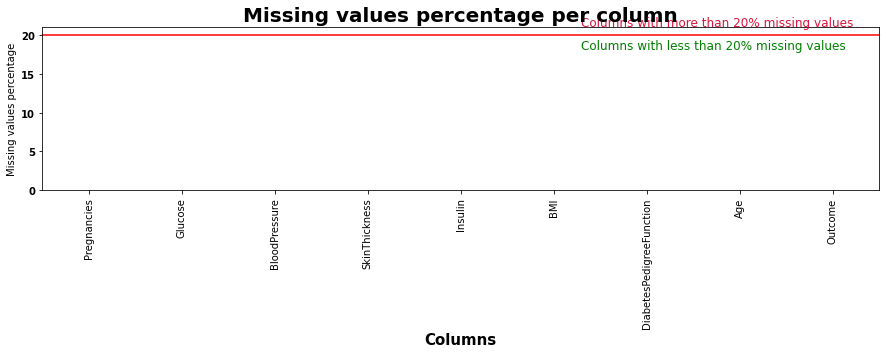

In [530]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

In [531]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

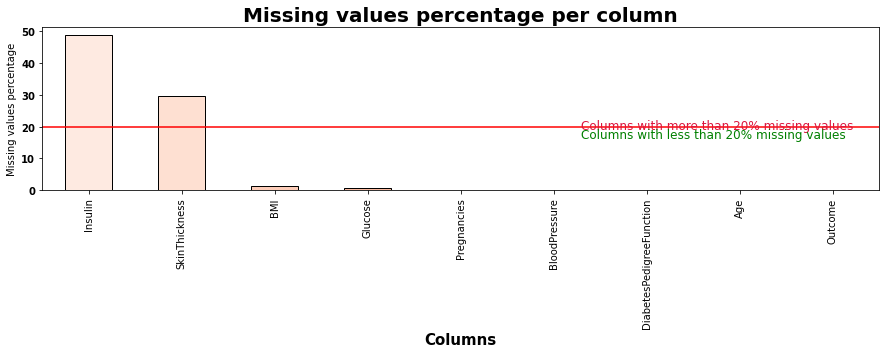

In [532]:
msv_1(df, 20, color=sns.color_palette('Reds',15))

- Since Gluocse, BP, Skinthickness and BMI are normally distrubuted, we can replace the missing values with their __mean__
-  For columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness.

In [533]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median()) 

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())

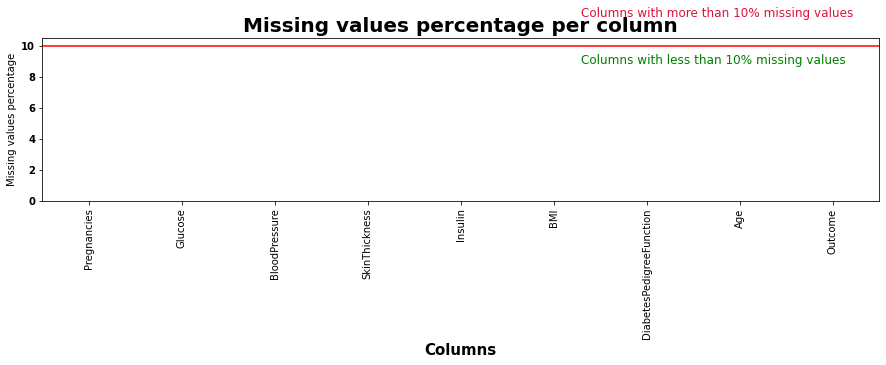

In [534]:
msv_1(df, 10, color=sns.color_palette('Greens',15))

Observation:
- Insulin has closed to 50% missing values
- SkinThickness has almost 30% missing values

<AxesSubplot:>

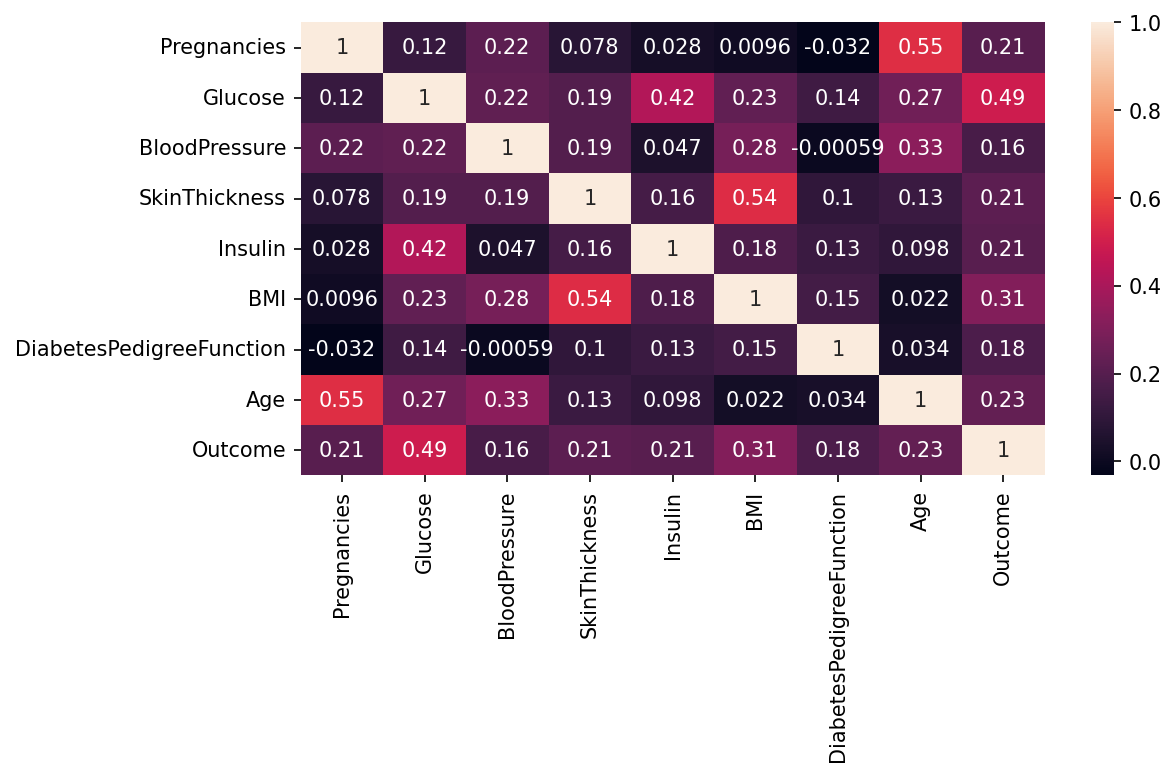

In [535]:
plt.figure(figsize=(8,4), dpi=150)

corr = df.corr()
# print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
         annot=True)

<AxesSubplot:>

<Figure size 1200x600 with 0 Axes>

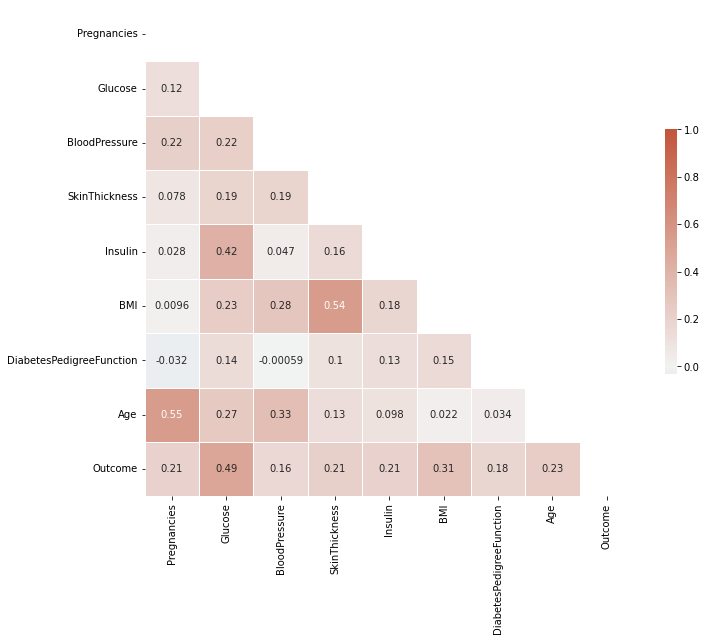

In [578]:
plt.figure(figsize=(8,4), dpi=150)

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

- From above Heatmap, it is clear that there is NO __Multicollinearity__ between the independent features

## MODEL BUILDING

### - STANDARDIZING THE DATA

In [580]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [595]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [596]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Standardizing the data. Why?


- Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

- This can be thought of as subtracting the mean value or centering the data. Scaling the features is of utmost importance because different features are in different scales. Let's say the Age has values in double digits, whereas the DPF is of the kind float, the effect of the Age feature will be more as compared to the DPF

- Best practice is to use only the training set to figure out how to scale / normalize, then blindly apply the same transform to the test set.

- For example, say you're going to normalize the data by removing the mean and dividing out the variance. If you use the whole dataset to figure out the feature mean and variance, you're using knowledge about the distribution of the test set to set the scale of the training set - 'leaking' information.

- The right way to do this is to use only the training set to calculate the mean and variance, normalize the training set, and then at test time, use that same (training) mean and variance to normalize the test set.

In [599]:
scaler = StandardScaler()
sclaed_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [600]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(sclaed_X_train,y_train)

LogisticRegression()

In [601]:
logistic_model.coef_

array([[ 0.30364779,  1.119834  , -0.16612358,  0.01190708, -0.14338231,
         0.7422888 ,  0.30010482,  0.25008638]])

In [603]:
y_pred = logistic_model.predict(scaled_X_test)

y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [604]:
y_pred_probability = logistic_model.predict_proba(scaled_X_test)

y_pred_probability

array([[0.18031782, 0.81968218],
       [0.55453563, 0.44546437],
       [0.27611542, 0.72388458],
       [0.26960933, 0.73039067],
       [0.61420596, 0.38579404],
       [0.98793834, 0.01206166],
       [0.90344296, 0.09655704],
       [0.72543012, 0.27456988],
       [0.44991759, 0.55008241],
       [0.81313235, 0.18686765],
       [0.13805705, 0.86194295],
       [0.51468078, 0.48531922],
       [0.88975376, 0.11024624],
       [0.11981228, 0.88018772],
       [0.15159435, 0.84840565],
       [0.79497692, 0.20502308],
       [0.58854861, 0.41145139],
       [0.13333226, 0.86666774],
       [0.87088462, 0.12911538],
       [0.83132716, 0.16867284],
       [0.92302092, 0.07697908],
       [0.97213232, 0.02786768],
       [0.66109529, 0.33890471],
       [0.23500601, 0.76499399],
       [0.70915263, 0.29084737],
       [0.61230791, 0.38769209],
       [0.4789627 , 0.5210373 ],
       [0.34972632, 0.65027368],
       [0.3642396 , 0.6357604 ],
       [0.08509164, 0.91490836],
       [0.

## PERFORMANCE METRICS

In [605]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [606]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8300653594771242

In [607]:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[96, 12],
       [14, 31]])

<Figure size 900x600 with 0 Axes>

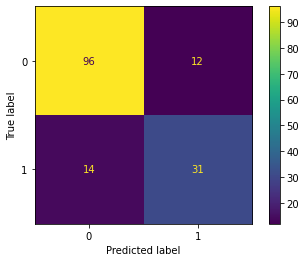

In [610]:
from sklearn.metrics import plot_confusion_matrix

plt.figure(dpi=150)
plot_confusion_matrix(logistic_model,scaled_X_test,y_test)

In [611]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       108
           1       0.72      0.69      0.70        45

    accuracy                           0.83       153
   macro avg       0.80      0.79      0.79       153
weighted avg       0.83      0.83      0.83       153



In [612]:
from sklearn.linear_model import LogisticRegressionCV

In [614]:
logistic_model_cv = LogisticRegressionCV()

logistic_model_cv.fit(sclaed_X_train,y_train)

LogisticRegressionCV()

In [615]:
logistic_model_cv.C_

array([0.35938137])

In [619]:
logistic_model_cv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [620]:
logistic_model_cv.coef_

array([[ 0.29472237,  1.08281347, -0.15159159,  0.02272384, -0.1262666 ,
         0.71179857,  0.29189803,  0.24683206]])

In [621]:
y_pred_cv = logistic_model_cv.predict(scaled_X_test)

In [623]:
coeffs = pd.Series(index=X.columns,data=logistic_model_cv.coef_[0])

coeffs

Pregnancies                 0.294722
Glucose                     1.082813
BloodPressure              -0.151592
SkinThickness               0.022724
Insulin                    -0.126267
BMI                         0.711799
DiabetesPedigreeFunction    0.291898
Age                         0.246832
dtype: float64

<AxesSubplot:>

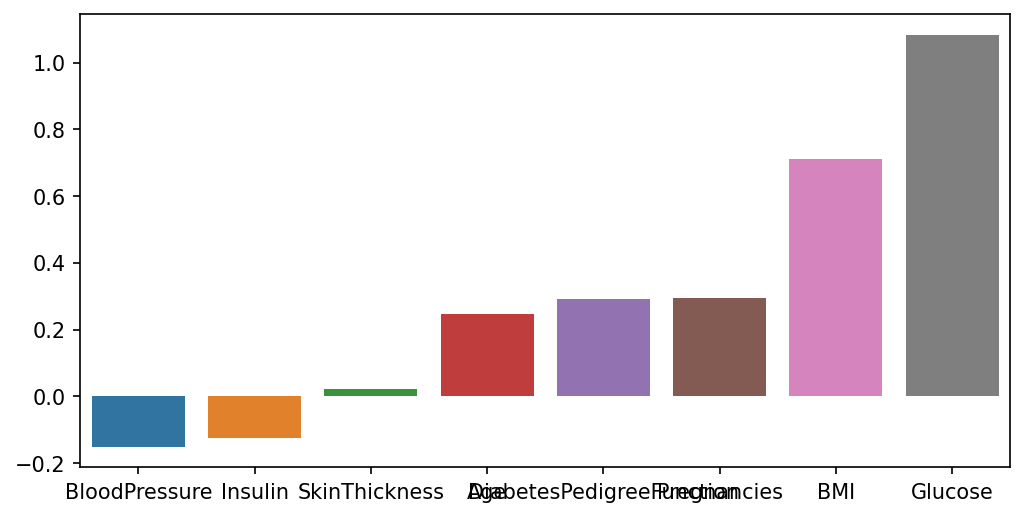

In [626]:
plt.figure(figsize=(8,4),dpi=150)
coeffs = coeffs.sort_values()
sns.barplot(x=coeffs.index,y=coeffs.values)

In [628]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

confusion_matrix(y_test,y_pred_cv)

array([[96, 12],
       [14, 31]])

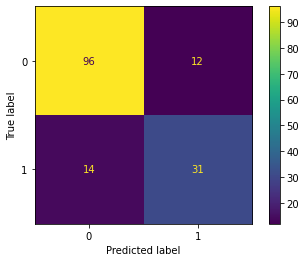

In [629]:
plot_confusion_matrix(logistic_model_cv,scaled_X_test,y_test)

In [630]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       108
           1       0.72      0.69      0.70        45

    accuracy                           0.83       153
   macro avg       0.80      0.79      0.79       153
weighted avg       0.83      0.83      0.83       153

